In [ ]:
Analysis of the Titanic passengers dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

**Context** This notebook is my project 'Investigate a dataset' submission. Delivering this project is one of the requirements of Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). The notebook has been reviewed by a member of Udacity. *Note for the reviewer: this will be true by the time anyone else other than you reads this*

By successfully completing this project, Udacity students demonstrate they know how to go through the entire data analysis process.

**Structure** I start by presenting the data used for the analysis. Then set the goal of the analysis, presenting the questions that I would like to answer. After that, I perform the analysis needed to answer these questions. Finally I draw conclusions, some tentative, others supported by hypothesis testing.

The sinking of the RMS Titanic in April 1912 is certainly one of the most well-known shipwrecks in history. It continues to fascinate people up to our day, there is extensive information related to the event online (eg. [here](https://www.encyclopedia-titanica.org)) and there is even a full-sized replica being built.

Our dataset for the project contains demographics from 891 passengers and crew on board the RMS Titanic. It was downloaded from Udacity, which obtained it on [Kaggle](https://www.kaggle.com/c/titanic/data), where you will find a more detailed description. 

The Titanic dataset is very popular and suited for those getting started with data science and machine learning. Just at Kaggle, over 8,500 teams have participated in the Titanic competition.

![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

In [3]:
titanic_df = pd.read_csv('titanic-data.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Remove the describe table

In [5]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Panula, Master. Juha Niilo",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
The goal of my project was to:
1. Determine what factors made people more likely to survive
2. Provide an overview of the demographics of the Titanic passengers

# Question Stage

Remove the getting to know passengers block

**Getting to know the passengers**

- Age distribution
- Sex distribution
- How many passengers per class
- Age distribution by class
- Sex distribution by class
- Number of embarks by location
- Fare distribution
- Fare by class
- Passengers with the same ticket
- Survival statistics
- How many children died?

- Parent, Child and Sibling, Spouse
- How many families? Which ones escaped?
- Average passengers per cabin (optional)


**Correlations with Survival**
- how does passenger class correlate with survival?
- how does age correlate with survival?
- how does sex correlate with survival?
- how does having siblings or parents correlate with survival?
- how does cabin correlate with survival?
- Survival rate by embark location


**Random Questions**
- Who could have been Jack and Rose?
- Most common names for men and women - correlate this with 538 article
- How many passangers have middle names?
- Do names change between classes?

# Cleaning missing records

Put this dataframe close to where it is used

In [74]:
# remove passengers that do not have age record

titanic_no_age_nans_df = titanic_df.dropna(axis=0, how='any', subset= ['Age'])

# I decided not to use .dropna() with inplace = True - in order to keep the original data

In [75]:
titanic_no_age_nans_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Put this data frame close to where it is used

In [204]:
# Remove records of passengers with zero fare
# There are several possibles reasons for a fare=0 (see this post in the forum: https://discussions.udacity.com/t/zero-fares-on-titanic-data/163879/6?u=diogofcruz)
# Therefore it makes sense to analyze fares without the 15 special cases of null fare
titanic_no_null_fares = titanic_df[titanic_df['Fare']!=0.0]
print(titanic_no_null_fares.shape)

(876, 12)


# Descriptive Analysis

Go straight to the point - Get to the survival analysis - This can go to Extra analysis if I think it brings something

### Age

Out of the 891 passengers, there are age records for only 714 of them.

In [25]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

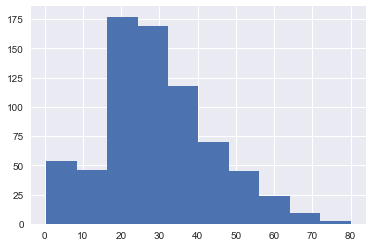

In [28]:
%matplotlib inline
titanic_df['Age']
titanic_df['Age'].hist()
plt.show()

Keep same style here. Here a chart would be good because now I am used to seeing charts to visualize.

### Age by Gender

In [203]:
titanic_df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


### Gender

In [190]:
men = titanic_df.Sex.value_counts()[0]
print(men)
women = titanic_df.Sex.value_counts()[1]
print(women)
total_passengers = len(titanic_df['PassengerId'])
print(total_passengers)          
men_perc = men/total_passengers
print(men_perc)
women_perc = 1- men_perc
print(women_perc)

577
314
891
0.64758698092
0.35241301908


count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


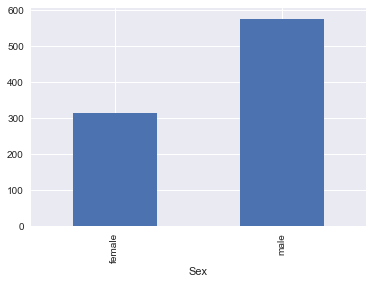

In [42]:
print(titanic_df['Sex'].describe())
sex_distribution = titanic_df.groupby(['Sex']).count()['PassengerId']
sex_distribution.plot.bar()

### General Survival Analysis

In [181]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [186]:
percentage_survived = titanic_df.Survived.mean()
percentage_survived

0.3838383838383838

In [11]:
titanic_df.groupby(['Sex', 'Pclass']).sum()['Survived'] # at meetup

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [12]:
titanic_df.groupby(['Pclass','Sex']).sum()['Survived']

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [192]:
women_survived = titanic_df.groupby('Sex').sum()['Survived'][0]
men_survived = titanic_df.groupby('Sex').sum()['Survived'][1]
women_survive_perc = women_survived/women
print(women_survive_perc)
men_survived_perc = men_survived/men
men

0.742038216561


0.18890814558058924

## Class analysis

In [9]:
class_groups = titanic_df.groupby('Pclass').agg({'PassengerId':'count','Survived':'mean','Age':'mean'\
                                                 ,'SibSp':'mean','Parch':'mean','Fare':'mean' })

class_groups

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,216,0.629630,38.233441,0.416667,0.356481,84.154687
2,184,0.472826,29.877630,0.402174,0.380435,20.662183
3,491,0.242363,25.140620,0.615071,0.393075,13.675550


### Age distribution by class

In [52]:
pclass_age = titanic_df.groupby('Pclass')['Age']
#data=class_data.groupby('Sex').agg({'Pclass':'count','Survived':'sum'})

In [53]:
pclass_age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [91]:
first_class_data = titanic_no_age_nans_df[titanic_no_age_nans_df['Pclass'] == 1]
second_class_data = titanic_no_age_nans_df[titanic_no_age_nans_df['Pclass'] == 2]
third_class_data = titanic_no_age_nans_df[titanic_no_age_nans_df['Pclass'] == 3]

In [83]:
type(first_class_data)

pandas.core.frame.DataFrame

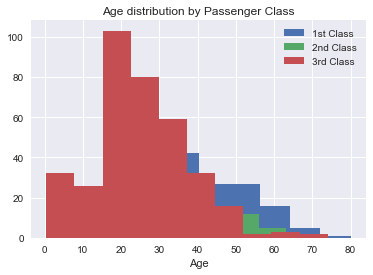

In [92]:
first_class_data = first_class_data['Age'].hist(label='1st Class')
second_class_data = second_class_data['Age'].hist(label='2nd Class')
third_class_data = third_class_data['Age'].hist(label='3rd Class')
plt.legend()
plt.xlabel('Age')
plt.title('Age distribution by Passenger Class')

# is it better to stack the plots to make it easier to see the difference? I think so
# alternatively I can also use sns distplot. this makes the plots semi-transparent as the example in the L1_Starter notebook

### Gender distribution per class

In [216]:
gender_class_mean = titanic_df.groupby(['Sex', 'Pclass'], as_index=False).mean()
gender_class_mean

,Sex,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,female,1,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
1,female,2,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
2,female,3,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
3,male,1,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
4,male,2,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
5,male,3,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


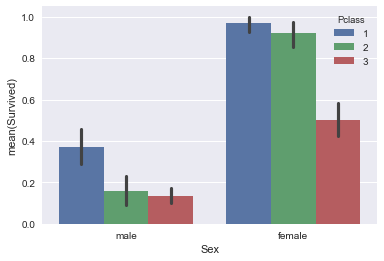

In [103]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

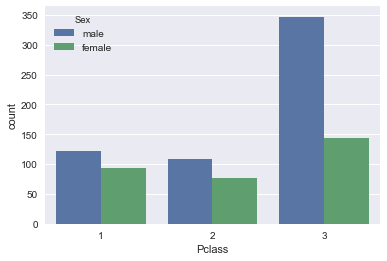

In [105]:
sns.countplot(x="Pclass", hue="Sex", data=titanic_df)

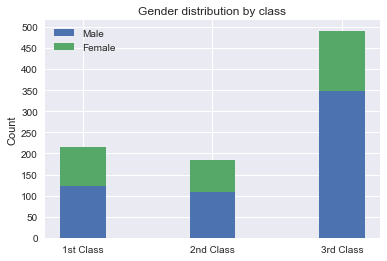

In [218]:
gender_class_count = titanic_df.groupby(['Sex', 'Pclass'], as_index=False).count()
N = 3
male_data = gender_class_count[gender_class_count['Sex']=='male']['PassengerId']
female_data = gender_class_count[gender_class_count['Sex']=='female']['PassengerId']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male_data, width)
p2 = plt.bar(ind, female_data, width,
             bottom=male_data)

plt.ylabel('Count')
plt.title('Gender distribution by class')
plt.xticks(ind, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 520, 50))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

In [220]:
print(male_data)
female_data

3    122
4    108
5    347
Name: PassengerId, dtype: int64


0     94
1     76
2    144
Name: PassengerId, dtype: int64

### Fare distribution, Fare distribution by class and by gender

In [113]:
titanic_df.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [206]:
# using the dataframe cleaned from null fares
titanic_no_null_fares.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,211.0,86.148874,78.212155,5.0000,32.9104,61.9792,99.9625,512.3292
2,178.0,21.358661,13.083169,10.5000,13.0000,15.0229,26.0000,73.5000
3,487.0,13.787875,11.760718,4.0125,7.7500,8.0500,15.5000,69.5500


In [121]:
print(titanic_df[titanic_df['Fare']==0.0].shape)
titanic_df[titanic_df['Fare']==0.0]

(15, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [154]:
titanic_no_null_fares.groupby('Pclass')['Fare'].idxmin()

Pclass
1    872
2     33
3    378
Name: Fare, dtype: int64

In [297]:
titanic_no_null_fares.loc[378]

PassengerId                    379
Survived                         0
Pclass                           3
Name           Betros, Mr. Tannous
Sex                           male
Age                             20
SibSp                            0
Parch                            0
Ticket                        2648
Fare                        4.0125
Cabin                          NaN
Embarked                         C
Name: 378, dtype: object

In [146]:
titanic_no_null_fares is titanic_df

False

In [153]:
titanic_no_null_fares.values.base is titanic_df

False

In [296]:
titanic_no_null_fares.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 18

In [156]:
titanic_no_null_fares[titanic_no_null_fares['Fare']==5.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [158]:
# Reason for ticket above being so cheap is because it was a company ticket: 
# https://www.encyclopedia-titanica.org/titanic-victim/frans-olof-carlsson.html

In [161]:
first_class_fare_data = titanic_no_null_fares[titanic_no_null_fares['Pclass'] == 1]
second_class__fare_data = titanic_no_null_fares[titanic_no_null_fares['Pclass'] == 2]
third_class__fare_data = titanic_no_null_fares[titanic_no_null_fares['Pclass'] == 3]

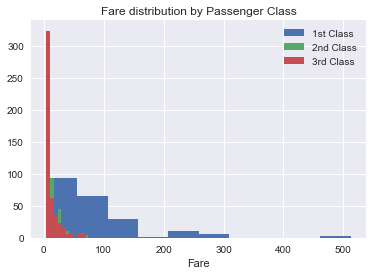

In [162]:
first_class_fare_data = first_class_data['Fare'].hist(label='1st Class')
second_class_fare_data = second_class_data['Fare'].hist(label='2nd Class')
third_class_fare_data = third_class_data['Fare'].hist(label='3rd Class')
plt.legend()
plt.xlabel('Fare')
plt.title('Fare distribution by Passenger Class')

# split this plot into 3 subplots

In [259]:
# average price paid by survivers and non-survivers (female and male)
titanic_no_null_fares.groupby(['Survived','Sex']).mean()['Fare']

Survived  Sex   
0         female    23.024385
          male      22.638204
1         female    51.938573
          male      41.199461
Name: Fare, dtype: float64

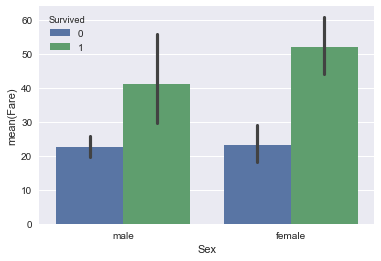

In [261]:
sns.barplot(x="Sex", y="Fare", hue="Survived", data=titanic_no_null_fares)

### Analysis of Embarks

In [111]:
embark_groups = titanic_df.groupby('Embarked').count()['PassengerId']
embark_groups

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [13]:
titanic_df.groupby(['Embarked','Survived']).count()['PassengerId']

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

### Analysis of Tickets

In [279]:
# Number of unique tickets
len(titanic_df['Ticket'].unique())

681

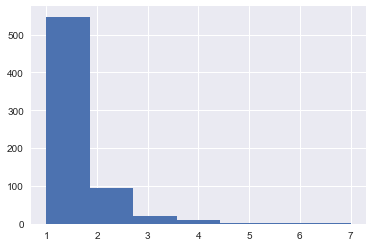

In [172]:
# Distribution of number of passengers per ticket
passengers_per_ticket = titanic_df.groupby('Ticket')['PassengerId'].count()

passengers_per_ticket.hist(bins=7)

Some passengers share ticket numbers. I assume it to be mostly couples/families.

In [278]:
# tickets associated with more than one passenger
shared_tickets = passengers_per_ticket > 1
np.sum(shared_tickets)

134

### Parents and Childs

In [267]:
# dataframe of passengers with SibSp or Parch > 0
titanic_drop_zeros_parch_sibsp = titanic_df[(titanic_df['SibSp'] != 0) & (titanic_df['Parch'] != 0)]
titanic_drop_zeros_parch_sibsp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S


In [288]:
# shared tickets that belong to passengers with either SibSp or Parch > 0
family_tickets = titanic_drop_zeros_parch_sibsp.groupby('Ticket', as_index=False).agg({'PassengerId': 'count', 'Survived': 'mean'})
family_tickets = family_tickets[family_tickets['PassengerId']>1]
len(group_tickets['PassengerId'])

38

In [289]:
family_tickets



,Ticket,PassengerId,Survived
0,110413,2,0.500000
1,113760,4,1.000000
2,113781,3,0.333333
3,11751,2,1.000000
7,17421,2,0.500000
8,19950,4,0.500000
9,220845,2,1.000000
10,230080,2,1.000000
11,230136,2,1.000000
19,2661,2,1.000000


In [284]:
family_tickets.mean()

PassengerId    3.026316
Survived       0.484649
dtype: float64

In [302]:
for (idx, row) in titanic_drop_zeros_parch_sibsp.iterrows():
    print (row.loc['Ticket'])
    break

349909


In [315]:
test_list = []
test_list.append(family_tickets[family_tickets['Ticket']=='17421']['PassengerId'].values[0])
test_list.append(family_tickets[family_tickets['Ticket']=='4133']['PassengerId'].values[0])
test_list
test_series = pd.Series(test_list)
test_series
test_list

[2, 4]

In [334]:
# list of passengers that have a 'family ticket'

# input dataframe with passenger info and dataframe with ticket number and count of passengers with that ticket
# output dataframe with passenger info and new column with count of passengers with that ticket

# go through each row of dataframe see if ticket is in second data frame

counts = []
for (idx, row) in titanic_drop_zeros_parch_sibsp.iterrows():
    if row.loc['Ticket'] in family_tickets['Ticket'].values:
        counts.append(family_tickets[family_tickets['Ticket'] == row.loc['Ticket']]['PassengerId'].values[0])
    else:
        counts.append(1)

# if it is add count of passenger to an array, if not add 1
# add series to dataframe based on index of dataframe

titanic_drop_zeros_parch_sibsp.insert(9,'Passenger_in_ticket',counts)

In [343]:
titanic_drop_zeros_parch_sibsp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Passenger_in_ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3,21.075,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,1,16.700,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,7,31.275,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,4,29.125,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,3,21.075,NaN,S


In [344]:
# How many familie members?
print(titanic_drop_zeros_parch_sibsp.shape)
len(counts)

(142, 13)


142

In [347]:
families = titanic_drop_zeros_parch_sibsp[titanic_drop_zeros_parch_sibsp['Passenger_in_ticket'] > 1].sort_values(by='Ticket')

In [354]:
# How many families?
len(families.groupby('Ticket'))

38

In [355]:
titanic_drop_zeros_parch_sibsp.mean()

PassengerId            454.816901
Survived                 0.436620
Pclass                   2.408451
Age                     21.181905
SibSp                    2.147887
Parch                    1.598592
Passenger_in_ticket      3.211268
Fare                    50.230194
dtype: float64

In [356]:
families.mean()

PassengerId            439.956522
Survived                 0.391304
Pclass                   2.469565
Age                     19.702500
SibSp                    2.373913
Parch                    1.713043
Passenger_in_ticket      3.730435
Fare                    53.008696
dtype: float64

# Correlation with survival

In [ ]:
# See my seaborn bar chart. It clearly shows the difference between men and women and between classes

In [178]:
from scipy import stats

In [224]:
# how does correlate with survival?

def scatter_plot(df):
    x = df['Age']
    y = df['Survived']
    plt.figure()
    plt.scatter(x, y, alpha=0.5)
    plt.ylabel('Survived')
    plt.xlabel('Age')
    plt.title('Age and survival')
    plt.show()
    return

In [196]:
titanic_df[titanic_df['Name'].str.contains('Cardeza')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [222]:
m1 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='male') & (titanic_no_age_nans_df['Pclass']==1)]
m1
m1.shape

(101, 12)

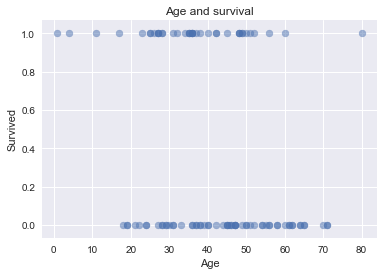

In [225]:
scatter_plot(m1)

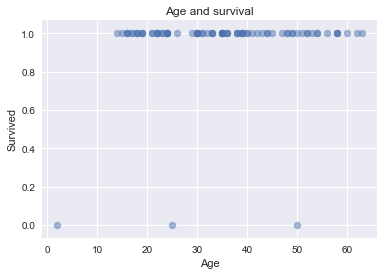

In [256]:
f1 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='female') & (titanic_no_age_nans_df['Pclass']==1)]
scatter_plot(f1)

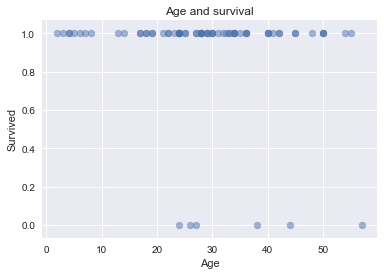

In [227]:
f2 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='female') & (titanic_no_age_nans_df['Pclass']==2)]
scatter_plot(f2)

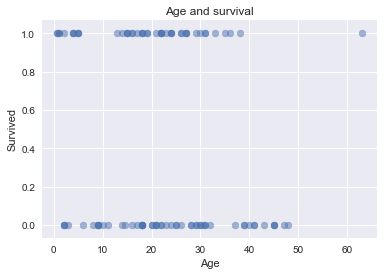

In [228]:
f3 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='female') & (titanic_no_age_nans_df['Pclass']==3)]
scatter_plot(f3)

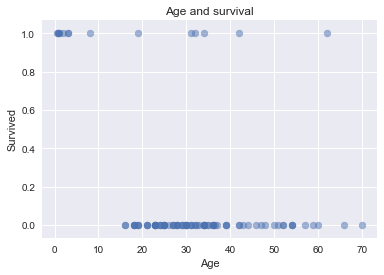

In [229]:
m2 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='male') & (titanic_no_age_nans_df['Pclass']==2)]
scatter_plot(m2)

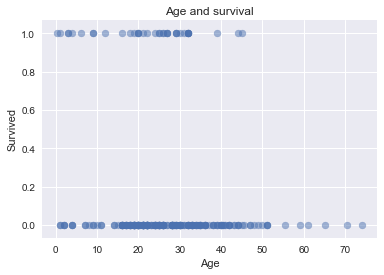

In [230]:
m3 = titanic_no_age_nans_df[(titanic_no_age_nans_df['Sex']=='male') & (titanic_no_age_nans_df['Pclass']==3)]
scatter_plot(m3)

In [255]:
children_u13 = titanic_no_age_nans_df[titanic_no_age_nans_df['Age'] < 13]
children_u13.groupby(['Sex','Pclass']).agg({'PassengerId':'count','Survived':'mean','Age':'mean'\
                                                 ,'SibSp':'mean','Parch':'mean','Fare':'mean' })

PassengerId  Survived       Age     SibSp     Parch        Fare
Sex    Pclass                                                                 
female 1                 1  0.000000  2.000000  1.000000  2.000000  151.550000
       2                 8  1.000000  4.875000  0.750000  1.500000   30.353650
       3                23  0.478261  4.891304  1.869565  1.434783   21.748909
male   1                 3  1.000000  5.306667  0.666667  2.000000  117.802767
       2                 9  1.000000  2.258889  0.888889  1.222222   27.306022
       3                25  0.360000  5.576800  2.760000  1.320000   27.289668

In [239]:
def survival_rate(df):
    return len(df[df['Survived']==1]['PassengerId'])/len(df['PassengerId'])
survival_rate(children_u13)

0.5797101449275363

In [240]:
children_u13_3c = children_u13[children_u13['Pclass']==3]

survival_rate(children_u13_3c)

0.4166666666666667

In [241]:
children_u13_1c = children_u13[children_u13['Pclass']==1]

survival_rate(children_u13_1c)

0.75